# Section 3: Keyword Analysis

## Focus:
How does the movie's category, content theme, and story source affect the economic gross?

## The Data:
The data are scrapped from the-numbers.com. The dataset include the top 100 movies each year from 2010 to the present.


   ### Time: 
- Release year
### Movies:
- Title (as individual unique identifier)
- Genre (the general category of the movie)
- Source (where is the screenplay coming from)
- Creative type (a more specific literal genre of the movie)
### Economic index:
- Budget (production cost)
- Domestic gross
- Worldwide gross & international gross
### Feature to be created:
- Net earnings (profit) = Revenue - Cost

## The Goals & Questions: 
- What are some popular genres or creative types associated with highly profitable movies?
- What type of sources or creative types are found within different genres?
- What type of sources are more profitable?

## Data Visualization Product:
- Distribution of the most popular keywords
- Keywords vs 
- box and whisker plot of averages per genre
- box and whisker of actual

# 3.0 Importing Libraries in need

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

# 3.1 Data Wrangling and Fact Learning

In [78]:
# Christine posted the data on github, therefore, it will be read in directly through the url
url = 'https://raw.githubusercontent.com/xinegan88/some_files/master/master_df.csv'
df_raw = pd.read_csv(url)
df_raw.head(5)

,Year,Title,TheatricalDistributor,Genre,Source,ProductionMethod,CreativeType,Budget,DomesticGross,InternationalGross,WorldwideGross,NetProfits,roi
0,2010,Toy Story 3,Walt Disney,Adventure,Original Screenplay,Digital Animation,Kids Fiction,200000000,415004880,653874642,1068879522,868879522,4.0
1,2010,Alice in Wonderland,Walt Disney,Adventure,Based on Fiction Book/Short Story,Animation/Live Action,Fantasy,200000000,334191110,691300000,1025491110,825491110,4.0
2,2010,Iron Man 2,Paramount Pictures,Action,Based on Comic/Graphic Novel,Live Action,Super Hero,170000000,312433331,308723058,621156389,451156389,3.0
3,2010,The Twilight Saga: Eclipse,Summit Entertainment,Drama,Based on Fiction Book/Short Story,Live Action,Fantasy,68000000,300531751,405571077,706102828,638102828,9.0
4,2010,Harry Potter and the Deathly Hallows:…,Warner Bros.,Adventure,Based on Fiction Book/Short Story,Animation/Live Action,Fantasy,125000000,296131568,664297789,960429357,835429357,7.0


In [79]:
# Overall statistics
df_raw.describe()

,Year,Budget,DomesticGross,InternationalGross,WorldwideGross,NetProfits,roi
count,978.000000,9.780000e+02,9.780000e+02,9.780000e+02,9.780000e+02,9.780000e+02,978.000000
mean,2014.476483,6.916435e+07,1.011480e+08,1.521420e+08,2.532900e+08,1.841257e+08,4.704499
std,2.858656,6.337172e+07,1.038481e+08,2.005615e+08,2.947350e+08,2.507765e+08,15.225349
min,2010.000000,1.000000e+05,2.045716e+07,0.000000e+00,2.136022e+07,-7.037182e+07,-1.000000
25%,2012.000000,2.200000e+07,3.929231e+07,2.898259e+07,7.533079e+07,4.120538e+07,1.000000
50%,2014.000000,4.500000e+07,6.377292e+07,7.369206e+07,1.427262e+08,9.113940e+07,2.000000
75%,2017.000000,1.000000e+08,1.176029e+08,1.980266e+08,3.071004e+08,2.131601e+08,4.000000
max,2019.000000,4.000000e+08,9.366622e+08,1.939428e+09,2.797801e+09,2.397801e+09,416.000000


In [80]:
# Take a first look
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 13 columns):
Year                     978 non-null int64
Title                    978 non-null object
TheatricalDistributor    978 non-null object
Genre                    978 non-null object
Source                   978 non-null object
ProductionMethod         978 non-null object
CreativeType             978 non-null object
Budget                   978 non-null int64
DomesticGross            978 non-null int64
InternationalGross       978 non-null int64
WorldwideGross           978 non-null int64
NetProfits               978 non-null int64
roi                      978 non-null float64
dtypes: float64(1), int64(6), object(6)
memory usage: 99.5+ KB


## <span style="color:##C71585"> **Note:** </span>
There is no missing value. 

In [83]:
# Checking with are the values available
print('Genres:', df.Genre.unique(), '\n'
      'Sources', df.Source.unique(), '\n'
      'Creativetype:', df.CreativeType.unique())

Genres: ['Adventure' 'Action' 'Drama' 'Thriller/Suspense' 'Musical' 'Western'
 'Comedy' 'Romantic Comedy' 'Horror' 'Black Comedy' 'Concert/Performance'
 'Documentary'] 
Sources ['Original Screenplay' 'Based on Fiction Book/Short Story'
 'Based on Comic/Graphic Novel' 'Based on Folk Tale/Legend/Fairytale'
 'Remake' 'Based on TV' 'Based on Real Life Events' 'Based on Game'
 'Based on Factual Book/Article' 'Based on Short Film' 'Spin-Off'
 'Based on Play' 'Based on Theme Park Ride' 'Based on Musical or Opera'
 'Based on Toy' 'Based on Religious Text' 'Based on Song' 'Based on Movie'] 
Creativetype: ['Kids Fiction' 'Fantasy' 'Super Hero' 'Science Fiction'
 'Contemporary Fiction' 'Historical Fiction' 'Dramatization' 'Factual'
 'Multiple Creative Types']


## <span style="color:##C71585"> **Note:** </span>
It is very interesting that in the genres, we see more than one Comedy type: Romantic Comedy, Black Comedy. Perhaps later on, those can be all labeled comedy to see if the humourous element plays a role in attractions. 

# 3.2 Visualization and Interpretations

The following section will be using the available data to create visualization which helps to interpret the market popularity and economic performance. 

In [85]:
#Heat Map: 
#Making a pivot table
genre_pivot = pd.pivot_table(df, values='WorldwideGross', index=['Genre'],
                    columns=['Year'], aggfunc=np.mean).fillna(0)
# Change the number to millions
for i in range(2010,2020):
    genre_pivot[i] = genre_pivot[i].apply(lambda x: "{:.2f}".format(x/1000000)).astype(float)
genre_pivot

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Genre,,,,,,,,,,
Action,251.35,357.55,396.25,350.13,396.29,498.43,490.35,478.71,497.38,554.31
Adventure,388.99,349.70,437.57,379.18,403.09,412.21,509.28,379.10,386.81,536.53
Black Comedy,97.53,41.33,238.20,187.40,103.22,61.79,59.60,87.37,83.38,98.15
Comedy,137.52,148.63,139.88,132.28,147.65,127.06,112.93,94.25,95.75,71.93
Concert/Performance,0.00,99.03,32.70,50.43,0.00,0.00,23.59,0.00,0.00,0.00
Documentary,0.00,0.00,33.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Drama,156.12,139.09,202.31,137.80,127.27,131.97,117.53,151.44,177.86,109.90
Horror,123.21,123.20,99.47,142.63,116.63,81.07,132.47,239.25,154.63,124.76
Musical,585.73,62.99,176.87,1268.75,176.47,0.00,540.47,832.78,372.49,75.48


In [87]:
# Pivot table for genre, net profit means
group_genre_profit = pd.pivot_table(df, values='NetProfits', index=['Genre'],
                    columns=['Year'], aggfunc='mean').fillna(0)

# Change the number to millions
for i in range(2010,2020):
    group_genre_profit[i] = group_genre_profit[i].apply(lambda x: "{:.2f}".format(x/1000000)).astype(float)

In [88]:
# Pivot table for ROI means
group_genre_roi = pd.pivot_table(df, values='roi', index=['Genre'],
                    columns=['Year'], aggfunc='mean').fillna(0)

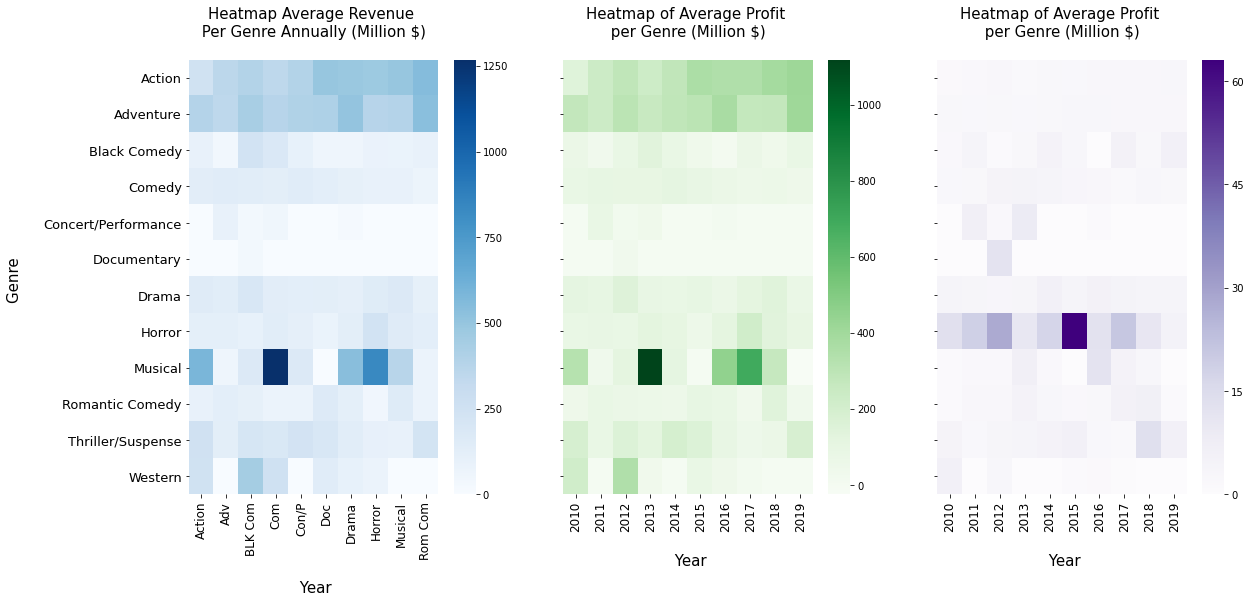

In [98]:
## 

f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(19,8), sharey=True)

# Genre and overall revenue average
r1 = sns.heatmap(genre_pivot, cmap='Blues', ax=ax1)
r1.set_title("Heatmap Average Revenue \n Per Genre Annually (Million $) \n", fontsize=15)
r1.tick_params(axis='y', labelsize=13)
r1.tick_params(axis='x', labelsize=12)
r1.set_ylabel('Genre \n', fontsize=15)
r1.set_xlabel('\n Year', fontsize=15)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Testing'
r1.set_xticklabels(['Action', 'Adv', 'BLK Com', 'Com', 'Con/P', 'Doc',
                  'Drama', 'Horror', 'Musical', 'Rom Com', 'Thr', 'Wes'])


# Genre and overall profit average

r2 = sns.heatmap(group_genre_profit, cmap='Greens', ax=ax2)
r2.set_title("Heatmap of Average Profit \n per Genre (Million $) \n", fontsize=15)
r2.set_ylabel("")
r2.set_xlabel('\n Year', fontsize=15)
r2.tick_params(axis='x', labelsize=12)

## Genre vs ROI average

r3 = sns.heatmap(group_genre_roi, cmap='Purples', ax=ax3)
r3.set_title("Heatmap of Average Profit \n per Genre (Million $) \n", fontsize=15)
r3.set_ylabel("")
r3.set_xlabel('\n Year', fontsize=15)
r3.tick_params(axis='x', labelsize=12)


## Theatretical Distributor 

### Overall Movie Production Number vs Average Revenue
**Question**:How's the overall top production number for Theatretical Distributor?
(There are many distributors and we will look at the top 10). 

In [107]:
group = df.groupby(df.TheatricalDistributor)['Budget','WorldwideGross','NetProfits', 'roi'].mean()
count = df.groupby(df.TheatricalDistributor)['Title'].count()
combine = pd.merge(pd.DataFrame(group).reset_index(), 
                   pd.DataFrame(count).reset_index(), 
                  on='TheatricalDistributor').sort_values(by=['Title'], ascending=False)
combine.head()

,TheatricalDistributor,Budget,WorldwideGross,NetProfits,roi,Title
32,Warner Bros.,7.855342e+07,2.590763e+08,1.805228e+08,5.875776,161
26,Sony Pictures,5.981830e+07,2.078933e+08,1.480750e+08,3.716312,141
30,Universal,6.170985e+07,2.653352e+08,2.036254e+08,6.189394,132
0,20th Century Fox,7.830855e+07,2.675114e+08,1.892028e+08,2.863248,117
20,Paramount Pictures,8.129167e+07,2.596077e+08,1.783160e+08,5.010417,96


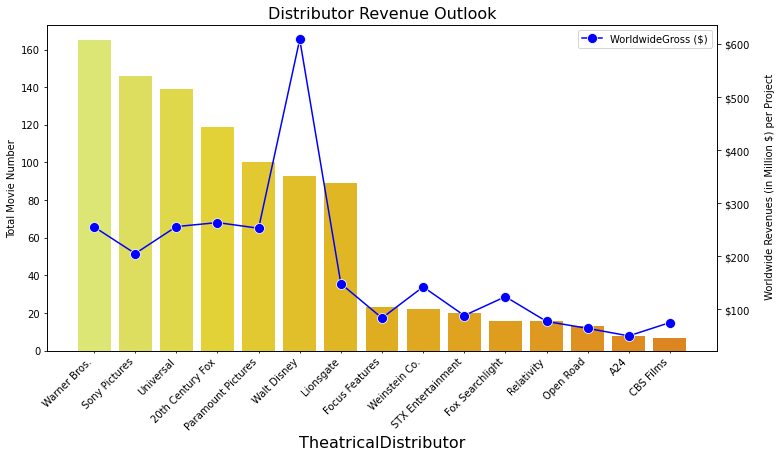

In [18]:
fig, ax1 = plt.subplots(figsize=(12,6))

def to_million(x, pos):
    return '$%1.0f' % (x*1e-6)


# Total Production number
ax1.set_title('Distributor Revenue Outlook', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='TheatricalDistributor', y='Title', data = combine[:15], palette='Wistia', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='TheatricalDistributor', y='WorldwideGross', data = combine[:15], sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'WorldwideGross ($)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n WorldwideGross per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)

# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Worldwide Revenues (in Million $) per Project')

ax1.grid(False)
ax2.grid(False)

### Overall Movie Production Number vs Average Profit
**Question**:How's the overall revenue for Theatretical Distributor?
(There are many distributors and we will look at the top 10). 

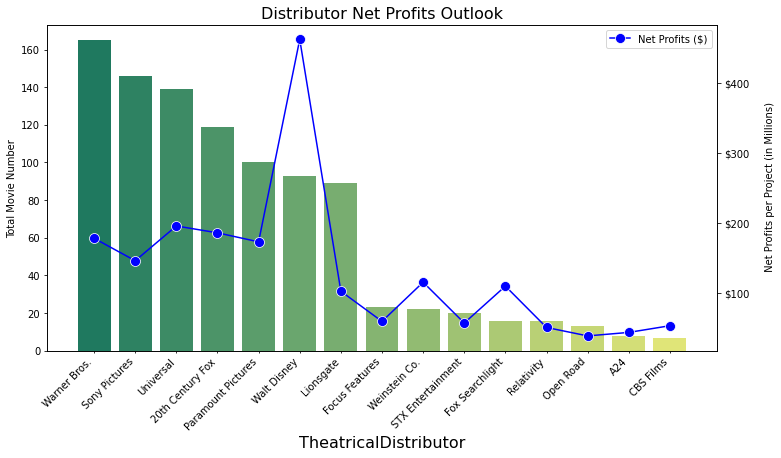

In [19]:
fig, ax1 = plt.subplots(figsize=(12,6))

def to_million(x, pos):
    return '$%1.0f' % (x*1e-6)


# Total Production number
ax1.set_title('Distributor Net Profits Outlook', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='TheatricalDistributor', y='Title', data = combine[:15], palette='summer', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='TheatricalDistributor', y='NetProfits', data = combine[:15], sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits ($)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)

# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Net Profits per Project (in Millions)')

ax1.grid(False)
ax2.grid(False)

Text(0.5, 0, '\n Distributor Name')

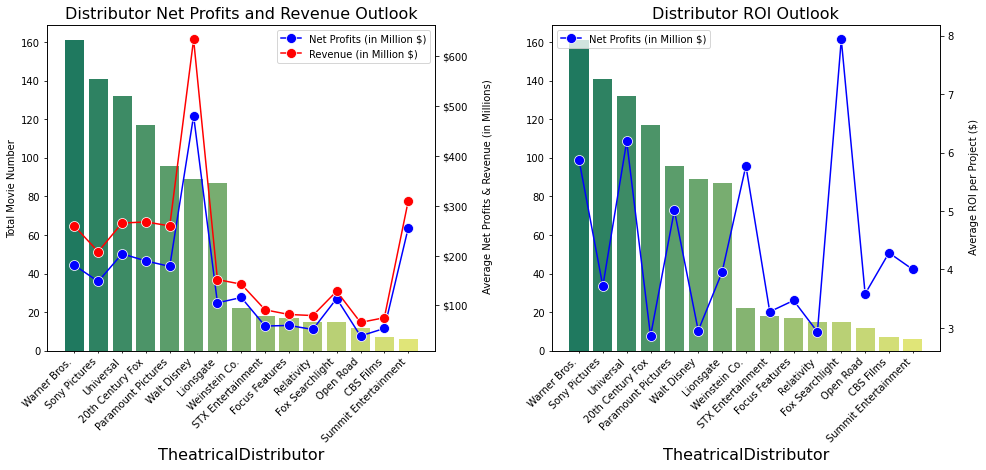

In [119]:
# Putting Total movie number, revenue, and net profits together

fig, (ax1, ax4) = plt.subplots(1,2,figsize=(16,6))
plt.subplots_adjust(wspace=0.3)

def to_million(x, pos):
    return '$%1.0f' % (x*1e-6)


# Total Production number
ax1.set_title('Distributor Net Profits and Revenue Outlook', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='TheatricalDistributor', y='Title', data = combine[:15], palette='summer', 
                  label = 'Total Movie Number', ax=ax1)
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='TheatricalDistributor', y='NetProfits', data = combine[:15], sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits (in Million $)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)


ax3 = sns.lineplot(x='TheatricalDistributor', y='WorldwideGross', data = combine[:15], sort=False, 
                   marker = 'o', markersize = 10, color='red', label = 'Revenue (in Million $)')
ax3.tick_params(axis='y')


# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Average Net Profits & Revenue (in Millions)')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)


# Second chart
# Number of counts
ax4.set_title('Distributor ROI Outlook', fontsize=16)
ax4.set_xlabel('\n Distributor Name', fontsize=16)
ax4 = sns.barplot(x='TheatricalDistributor', y='Title', data = combine[:15], palette='summer', 
                  label = 'Total Movie Number', ax=ax4)
ax4.tick_params(axis='x', rotation = 45, length=2)
ax4.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')
#ax4.get_yaxis().set_visible(False)
ax4.set_ylabel("\n")

# ROI per Distributor
ax5 = ax4.twinx()

ax5 = sns.lineplot(x='TheatricalDistributor', y='roi', data = combine[:15], sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits (in Million $)')
ax5.tick_params(axis='y')
ax5.set_ylabel('\n Average ROI per Project ($)', fontsize = 10)
ax5.set_xlabel('\n Distributor Name', fontsize=16)



## Distributor Genre Diversity

In [31]:
distri_genre = df.groupby(df.TheatricalDistributor).agg({"Genre": "nunique", "CreativeType": "nunique"})
combine_gen_econ = pd.merge(pd.DataFrame(distri_genre).reset_index(), 
                   pd.DataFrame(combine).reset_index(), 
                  on='TheatricalDistributor').sort_values(by=['Title'], ascending=False)
combine_gen_econ.head(10)

,TheatricalDistributor,Genre,CreativeType,index,Budget,WorldwideGross,NetProfits,Title
66,Warner Bros.,10,9,66,7.714606e+07,2.556931e+08,1.785471e+08,165
58,Sony Pictures,11,8,58,5.887932e+07,2.054339e+08,1.465546e+08,146
63,Universal,10,7,63,6.023669e+07,2.563325e+08,1.960958e+08,139
1,20th Century Fox,8,7,1,7.753866e+07,2.638709e+08,1.863323e+08,119
46,Paramount Pictures,11,8,46,7.973000e+07,2.532109e+08,1.734809e+08,100
65,Walt Disney,9,8,65,1.471000e+08,6.093365e+08,4.622365e+08,93
34,Lionsgate,11,8,34,4.565169e+07,1.486431e+08,1.029914e+08,89
23,Focus Features,6,7,23,2.386957e+07,8.387938e+07,6.000982e+07,23
67,Weinstein Co.,6,6,67,2.672727e+07,1.426224e+08,1.158951e+08,22
54,STX Entertainment,7,4,54,3.089000e+07,8.855255e+07,5.766255e+07,20


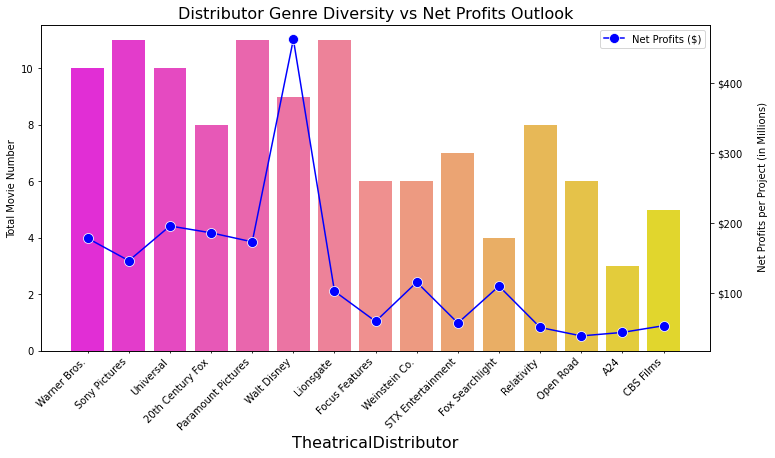

In [21]:
#Diversity and profit 
fig, ax1 = plt.subplots(figsize=(12,6))

# Total Production number
ax1.set_title('Distributor Genre Diversity vs Net Profits Outlook', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='TheatricalDistributor', y='Genre', data = combine_gen_econ[:15], palette='spring', 
                  label = 'Genre Type Count')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='TheatricalDistributor', y='NetProfits', data = combine_gen_econ[:15], sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits ($)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)

# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Net Profits per Project (in Millions)')

ax1.grid(False)
ax2.grid(False)

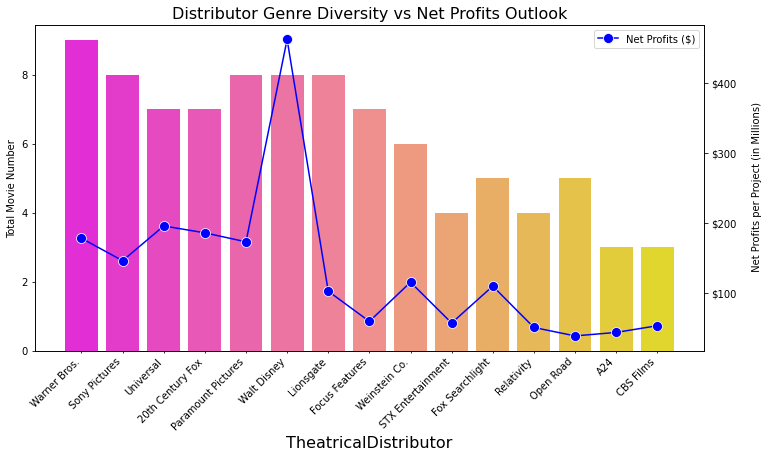

In [22]:
#Literature Theme and profit 
fig, ax1 = plt.subplots(figsize=(12,6))

def to_million(x, pos):
    return '$%1.0f' % (x*1e-6)


# Total Production number
ax1.set_title('Distributor Genre Diversity vs Net Profits Outlook', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='TheatricalDistributor', y='CreativeType', data = combine_gen_econ[:15], palette='spring', 
                  label = 'Content Style Category Count')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='TheatricalDistributor', y='NetProfits', data = combine_gen_econ[:15], sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits ($)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)

# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Net Profits per Project (in Millions)')

ax1.grid(False)
ax2.grid(False)

## Top Distributors

In [99]:
group_genre = df.groupby(['TheatricalDistributor', 'Genre']).agg({"WorldwideGross": "mean", 
                                                                  "NetProfits": "mean",
                                                                 "Title": "count"})

In [100]:
genre_group_df = pd.DataFrame(group_genre).reset_index()

In [101]:
genre_topstudio = genre_group_df[genre_group_df.TheatricalDistributor.isin(['Warner Bros.', 
                                                                           'Sony Pictures',
                                                                           'Universal',
                                                                           '20th Century Fox',
                                                                           'Paramount Pictures',
                                                                           'Walt Disney', 
                                                                           'Summit Entertainment'])]

In [102]:
genre_topstudio = genre_topstudio.sort_values(by = ['TheatricalDistributor', 'Title'], ascending=False)
genre_topstudio.head()

,TheatricalDistributor,Genre,WorldwideGross,NetProfits,Title
134,Warner Bros.,Comedy,1.298471e+08,8.900890e+07,34
131,Warner Bros.,Action,4.485057e+08,3.015057e+08,29
132,Warner Bros.,Adventure,3.837626e+08,2.555557e+08,29
135,Warner Bros.,Drama,1.333937e+08,8.746271e+07,29
136,Warner Bros.,Horror,2.471780e+08,2.200714e+08,15


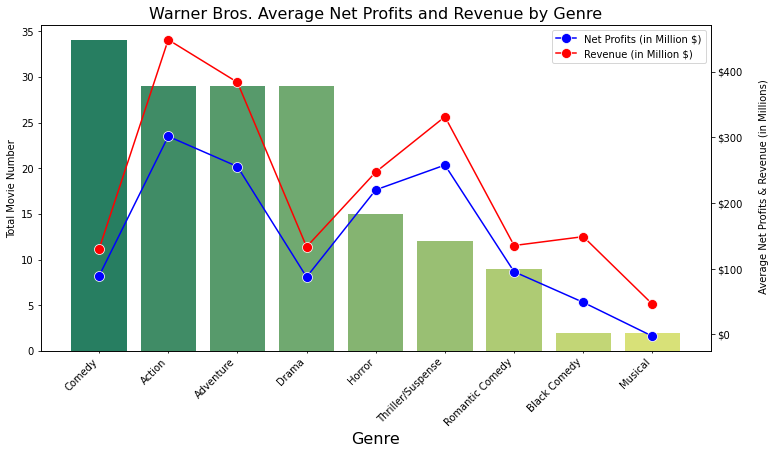

In [103]:
# Warner Bros. detailed graph
df_wb = genre_topstudio[genre_topstudio.TheatricalDistributor == 'Warner Bros.']


fig, ax1 = plt.subplots(figsize=(12,6))
# Total Production number

ax1.set_title('Warner Bros. Average Net Profits and Revenue by Genre', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='Genre', y='Title', data = df_wb, palette='summer', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='Genre', y='NetProfits', data = df_wb, sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits (in Million $)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)


ax3 = sns.lineplot(x='Genre', y='WorldwideGross', data = df_wb, sort=False, 
                   marker = 'o', markersize = 10, color='red', label = 'Revenue (in Million $)')
ax3.tick_params(axis='y')


# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Average Net Profits & Revenue (in Millions)')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

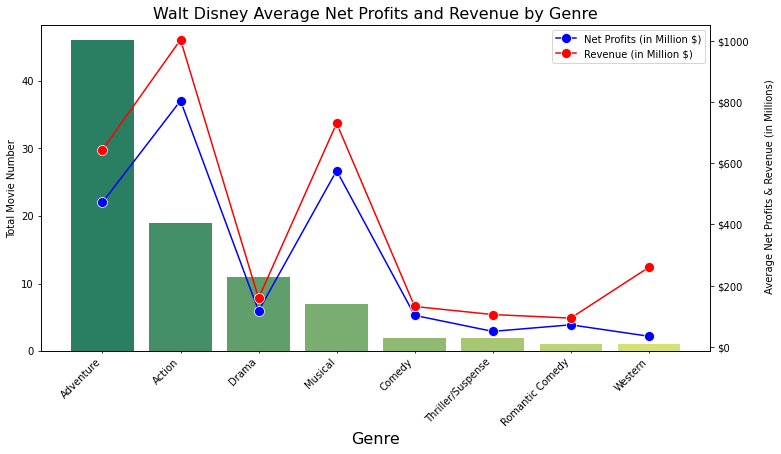

In [104]:
# Walt Disney detailed graph
df_wd = genre_topstudio[genre_topstudio.TheatricalDistributor == 'Walt Disney']


fig, ax1 = plt.subplots(figsize=(12,6))
# Total Production number

ax1.set_title('Walt Disney Average Net Profits and Revenue by Genre', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='Genre', y='Title', data = df_wd, palette='summer', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='Genre', y='NetProfits', data = df_wd, sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits (in Million $)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)


ax3 = sns.lineplot(x='Genre', y='WorldwideGross', data = df_wd, sort=False, 
                   marker = 'o', markersize = 10, color='red', label = 'Revenue (in Million $)')
ax3.tick_params(axis='y')


# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Average Net Profits & Revenue (in Millions)')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

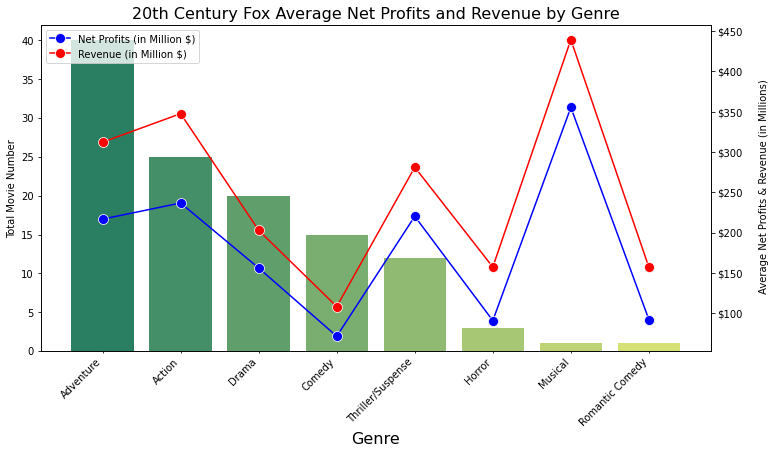

In [105]:
# 20th Century Fox detailed graph
df_cf = genre_topstudio[genre_topstudio.TheatricalDistributor == '20th Century Fox']


fig, ax1 = plt.subplots(figsize=(12,6))
# Total Production number

ax1.set_title('20th Century Fox Average Net Profits and Revenue by Genre', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='Genre', y='Title', data = df_cf, palette='summer', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='Genre', y='NetProfits', data = df_cf, sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits (in Million $)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)


ax3 = sns.lineplot(x='Genre', y='WorldwideGross', data = df_cf, sort=False, 
                   marker = 'o', markersize = 10, color='red', label = 'Revenue (in Million $)')
ax3.tick_params(axis='y')


# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Average Net Profits & Revenue (in Millions)')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

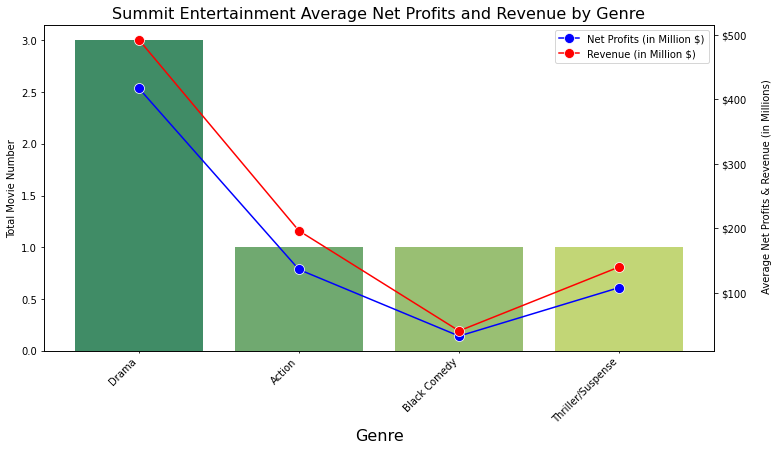

In [106]:
# 20th Century Fox detailed graph
df_se = genre_topstudio[genre_topstudio.TheatricalDistributor == 'Summit Entertainment']


fig, ax1 = plt.subplots(figsize=(12,6))
# Total Production number

ax1.set_title('Summit Entertainment Average Net Profits and Revenue by Genre', fontsize=16)
ax1.set_xlabel('\n Distributor Name', fontsize=16)
ax1 = sns.barplot(x='Genre', y='Title', data = df_se, palette='summer', 
                  label = 'Total Movie Number')
ax1.tick_params(axis='x', rotation = 45, length=2)
ax1.set_xticklabels(combine.TheatricalDistributor[:15], ha='right')

ax1.set_ylabel('Total Movie Number', fontsize = 10)

# Gross revenue line

ax2 = ax1.twinx()

ax2 = sns.lineplot(x='Genre', y='NetProfits', data = df_se, sort=False, 
                   marker = 'o', markersize = 10, color='blue', label = 'Net Profits (in Million $)')
ax2.tick_params(axis='y')
ax2.set_ylabel('\n Net Profits per Project ($)', fontsize = 10)
ax2.set_xlabel('\n Distributor Name', fontsize=16)


ax3 = sns.lineplot(x='Genre', y='WorldwideGross', data = df_se, sort=False, 
                   marker = 'o', markersize = 10, color='red', label = 'Revenue (in Million $)')
ax3.tick_params(axis='y')


# Change Y-axis format for gross revenue
format_y = FuncFormatter(to_million)
ax2.yaxis.set_major_formatter(format_y)
ax2.set_ylabel('\n Average Net Profits & Revenue (in Millions)')

ax1.grid(False)
ax2.grid(False)
ax3.grid(False)